In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import statsmodels.api as sm
plt.style.use('seaborn-whitegrid')

C:\Users\aryan\AppData\Local\Temp\ipykernel_27828\878524530.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
df0 = pd.read_csv('prices_round_3_day_0.csv', index_col='timestamp', delimiter=';')
df1 = pd.read_csv('prices_round_3_day_1.csv', index_col='timestamp', delimiter=';')
df2 = pd.read_csv('prices_round_3_day_2.csv', index_col='timestamp', delimiter=';')
df = pd.concat([df0,df1,df2], ignore_index=True).reset_index(drop=True)
df.head(10)

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
5,0,CHOCOLATE,8001,52,8000.0,95.0,NaN,NaN,8002,147,NaN,NaN,NaN,NaN,8001.5,0.0
6,0,ROSES,14999,66,NaN,NaN,NaN,NaN,15001,66,NaN,NaN,NaN,NaN,15000.0,0.0
7,0,STRAWBERRIES,3999,265,NaN,NaN,NaN,NaN,4000,265,NaN,NaN,NaN,NaN,3999.5,0.0
8,0,ROSES,15000,61,NaN,NaN,NaN,NaN,15001,21,15002.0,40.0,NaN,NaN,15000.5,0.0
9,0,GIFT_BASKET,71344,4,71339.0,1.0,71338.0,14.0,71350,1,71351.0,14.0,71352.0,21.0,71347.0,0.0


In [28]:
df_chocolate = df.loc[df['product']=='CHOCOLATE'][['mid_price']]
df_gift_basket = df.loc[df['product']=='GIFT_BASKET'][['mid_price']]
df_strawberries = df.loc[df['product']=='STRAWBERRIES'][['mid_price']]
df_roses = df.loc[df['product']=='ROSES'][['mid_price']]

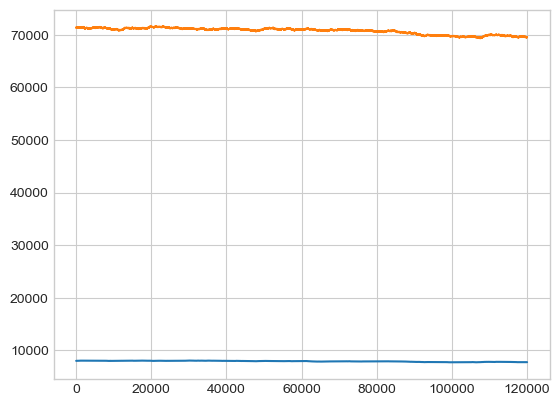

In [29]:
plt.plot(df_chocolate)
plt.plot(df_gift_basket)


In [7]:
x = list(np.log(df_chocolate['mid_price']))
x_const = sm.add_constant(x)
y = list(np.log(df_gift_basket['mid_price']))
linear_reg = sm.OLS(y,x_const)
results = linear_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 2.665e+05
Date:                Wed, 17 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:26:07   Log-Likelihood:             1.3477e+05
No. Observations:               30000   AIC:                        -2.695e+05
Df Residuals:                   29998   BIC:                        -2.695e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4098      0.011    485.124      0.000       5.388       5.432
x1             0.6413      0.001    516.207      0.000       0.639       0.644
==============================================================================
Omnibus:                      360.488   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.053
Skew:                           0.121   Prob(JB):                     9.21e-57
Kurtosis:                       2.616   Cond. No.                     6.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
beta = results.params[1]
alpha = results.params[0]

In [9]:
y_pred = np.log(df_chocolate['mid_price'])*beta + alpha

C:\Users\aryan\AppData\Local\Temp\ipykernel_27828\1921680674.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels([str(p) for p in df_chocolate['mid_price'].index])


Text(0, 0.5, 'gift_basket')

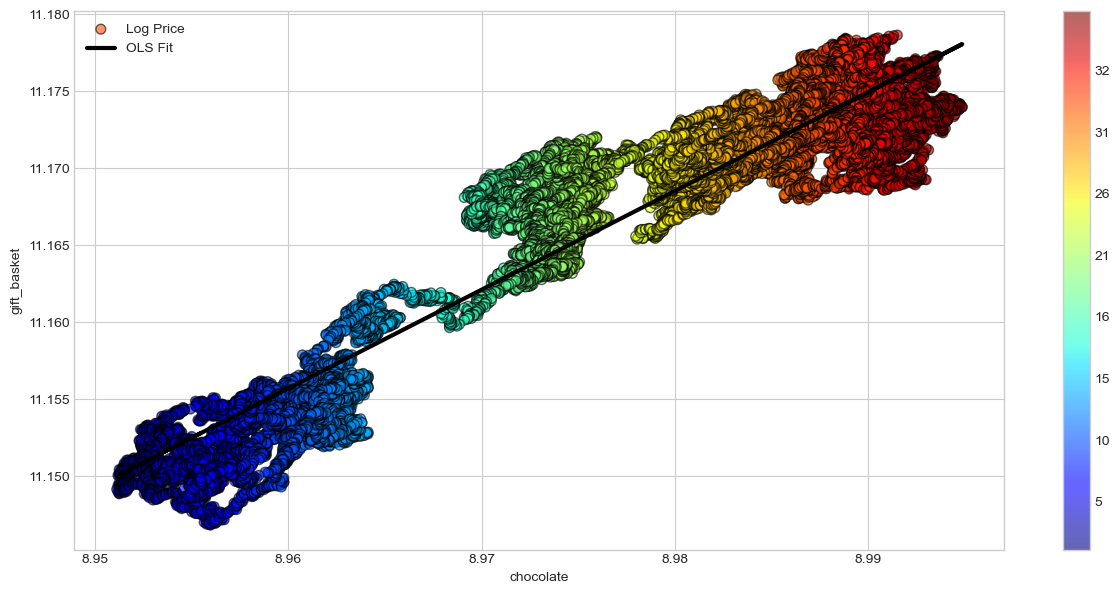

In [10]:
plt.figure(figsize =(15,7))
cm = plt.get_cmap('jet')
sc = plt.scatter(np.log(df_chocolate['mid_price']), np.log(df_gift_basket['mid_price']), s=50, c=x, cmap=cm, marker='o',
                 alpha=0.6,label='Log Price',edgecolor='k')
plt.plot(x, y_pred, '-',c='black',linewidth=3, label='OLS Fit')
plt.legend()
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p) for p in df_chocolate['mid_price'].index])
plt.xlabel('chocolate')
plt.ylabel('gift_basket')

Text(0, 0.5, 'spread')

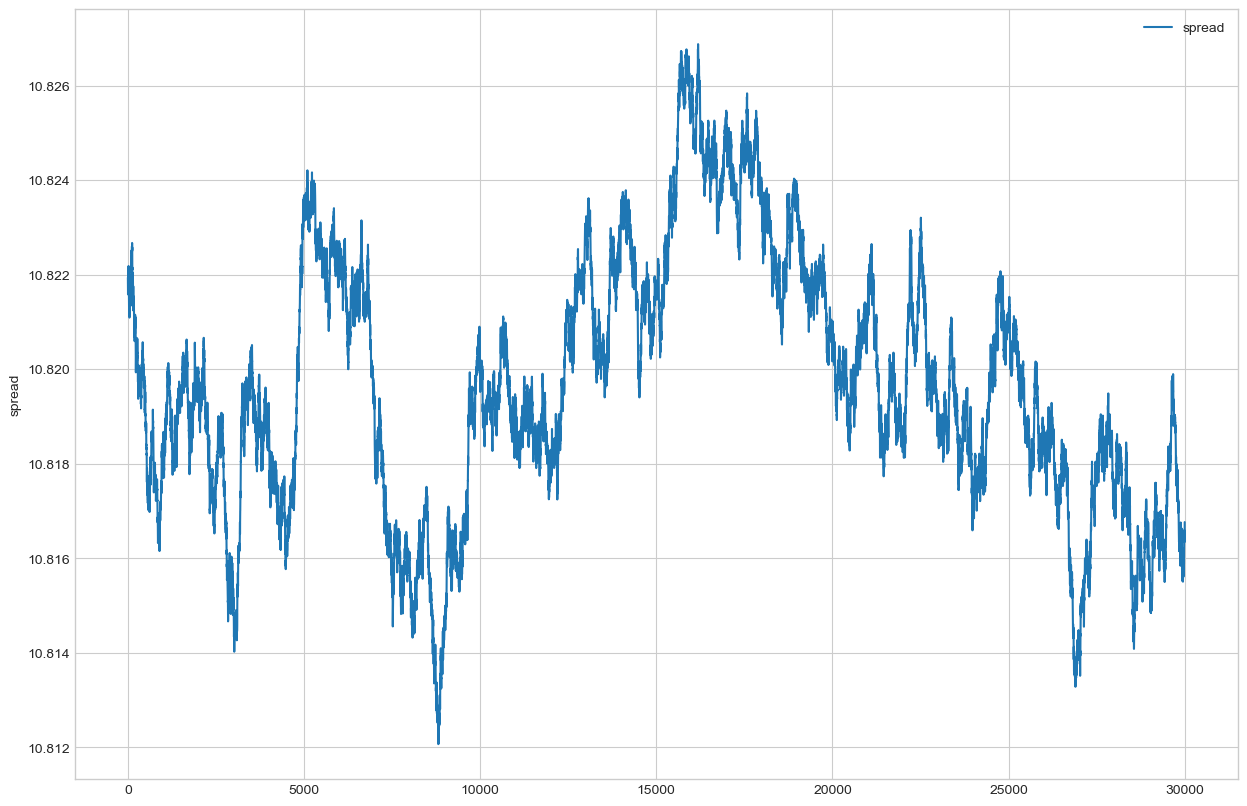

In [11]:
df_pairs = pd.DataFrame(np.log(df_gift_basket['mid_price']).to_numpy() - (np.log(df_chocolate['mid_price'])*beta-alpha).to_numpy())

df_pairs.columns = ['spread']
df_pairs.plot(figsize =(15,10))

plt.ylabel('spread')

In [12]:
# check if the spread is stationary 
adf = sm.tsa.stattools.adfuller(df_pairs['spread'], maxlag=1)
print('ADF test statistic: %.02f' % adf[0])
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))
print('p-value: %.03f' % adf[1])

ADF test statistic: -3.14
	1%: -3.431
	5%: -2.862
	10%: -2.567
p-value: 0.024


In [1]:
df_pairs['mean'] = df_pairs['spread'].mean()
df_pairs['upper'] = df_pairs['mean'] + 1.96*df_pairs['spread'].std()
df_pairs['lower'] = df_pairs['mean'] - 1.96*df_pairs['spread'].std()

NameError: name 'df_pairs' is not defined

<Axes: >

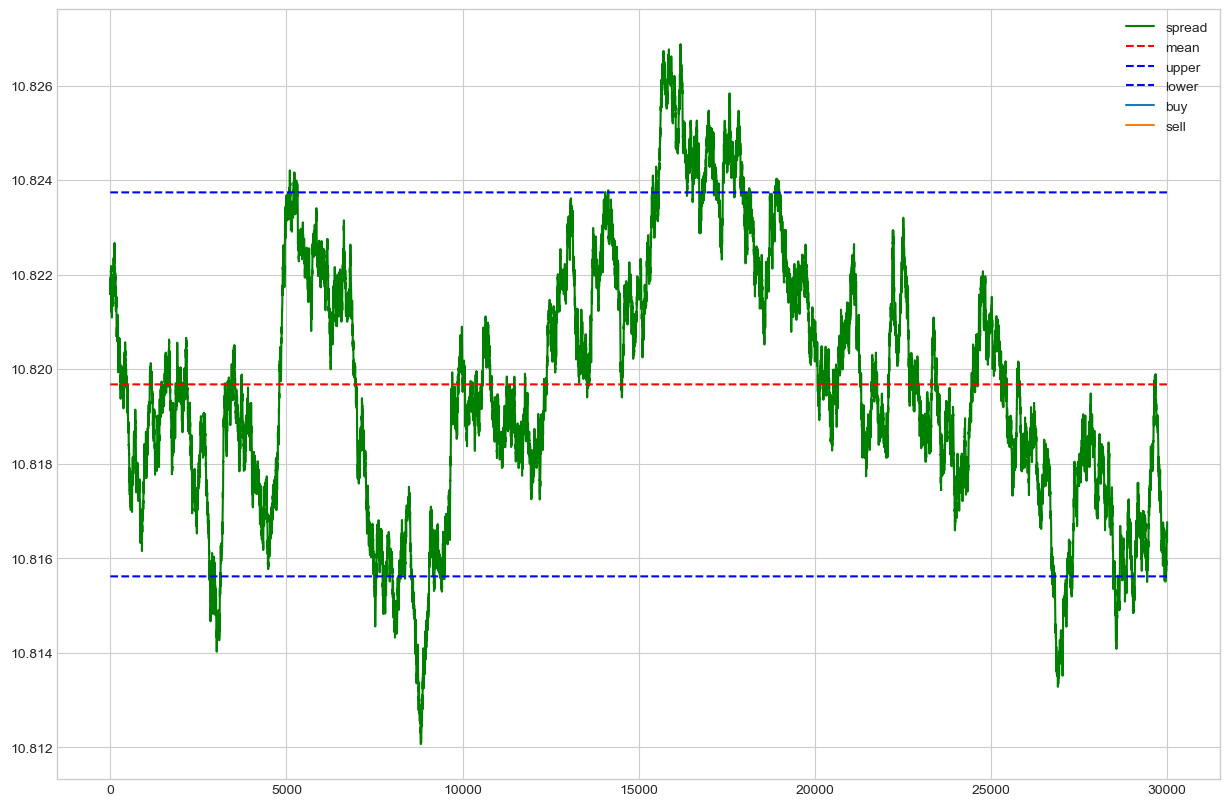

In [46]:
df_pairs.plot(figsize =(15,10),style=['g', '--r', '--b', '--b'])

<Axes: >

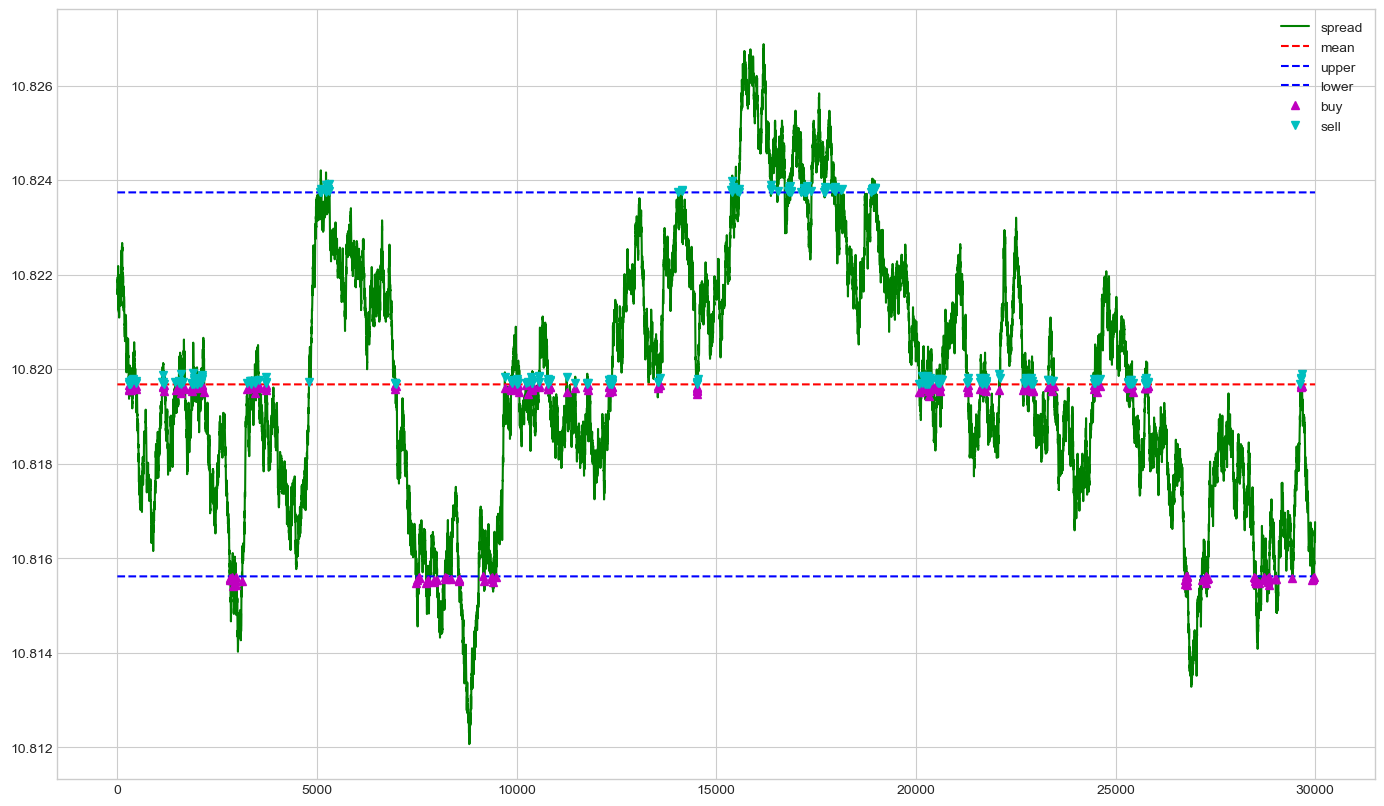

In [47]:
df_pairs['buy'] = df_pairs['spread'][((df_pairs['spread'] < df_pairs['lower']) & (df_pairs['spread'].shift(1) > df_pairs['lower']) | 
                          (df_pairs['spread'] <  df_pairs['mean']) & (df_pairs['spread'].shift(1) >  df_pairs['mean']))]

df_pairs['sell'] = df_pairs['spread'][((df_pairs['spread'] > df_pairs['upper']) & (df_pairs['spread'].shift(1) < df_pairs['upper']) | 
                           (df_pairs['spread'] >  df_pairs['mean']) & (df_pairs['spread'].shift(1) <  df_pairs['mean']))]
df_pairs.plot(figsize =(17,10), style=['g', '--r', '--b', '--b', 'm^','cv'])

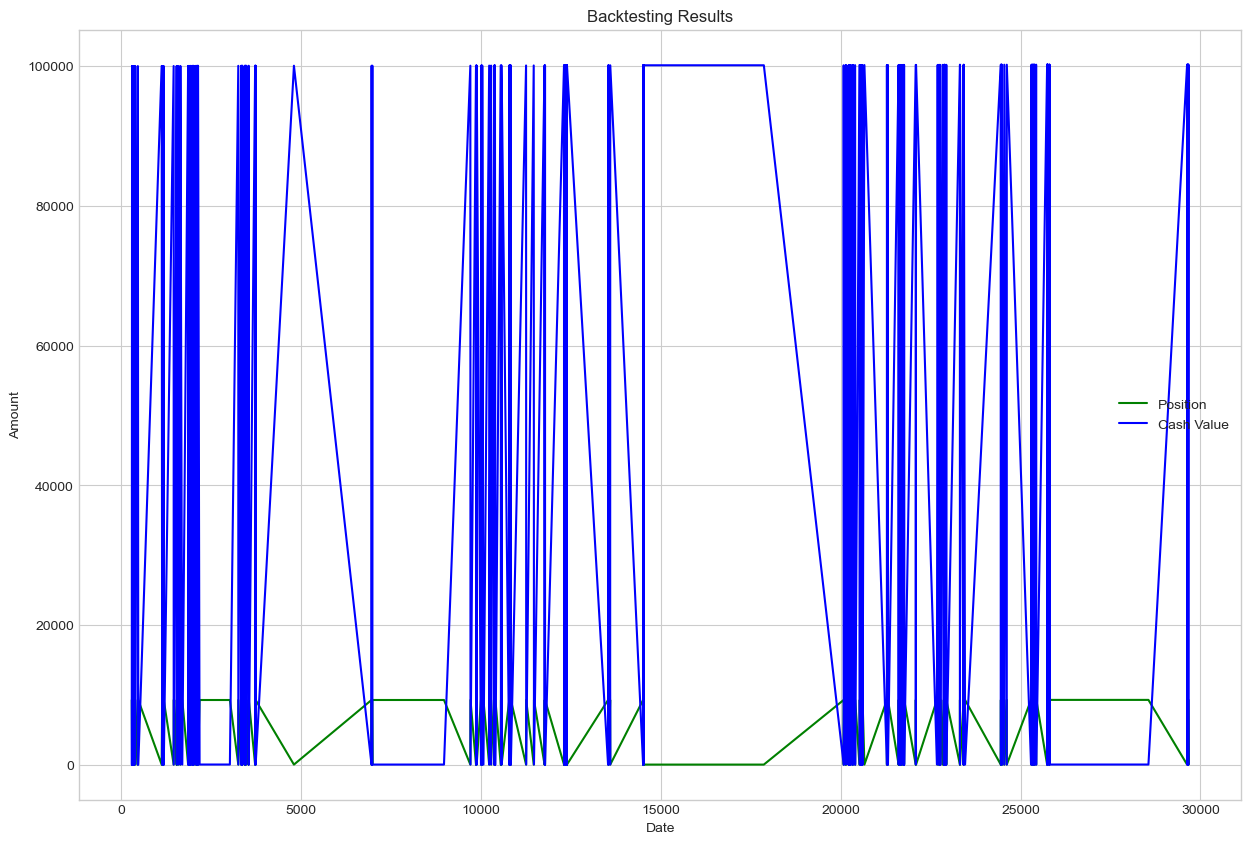

Final Account Balance: 100198.75980127485
Total Profit/Loss: 198.75980127484945
Return on Investment (ROI): 0.19875980127484946 %


In [44]:

# Initialize capital and positions
capital = 100000  # Initial capital
position = 0      # Initial position size

# Lists to store trade information
dates = []
positions = []
cash_values = []

# Loop through each row in df_pairs and execute trades based on buy and sell signals
for i, row in df_pairs.iterrows():
    if pd.notnull(row['buy']):
        # Buy signal
        shares_to_buy = capital // row['buy']  # Calculate number of shares to buy
        cost = shares_to_buy * row['buy']      # Calculate cost of buying shares
        capital -= cost                        # Reduce capital by the cost of buying shares
        position += shares_to_buy              # Increase position size
        dates.append(i)
        positions.append(position)
        cash_values.append(capital)
    elif pd.notnull(row['sell']):
        # Sell signal
        capital += position * row['sell']      # Increase capital by selling all shares
        position = 0                           # Reset position size to zero
        dates.append(i)
        positions.append(position)
        cash_values.append(capital)

# Convert lists to pandas Series for plotting
dates_series = pd.Series(dates)
positions_series = pd.Series(positions)
cash_values_series = pd.Series(cash_values)

# Plot the positions and cash values over time
plt.figure(figsize=(15, 10))
plt.plot(dates_series, positions_series, 'g-', label='Position')
plt.plot(dates_series, cash_values_series, 'b-', label='Cash Value')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Backtesting Results')
plt.legend()
plt.grid(True)
plt.show()

# Calculate final account balance
final_account_balance = capital + (position * df_pairs['spread'].iloc[-1])

# Calculate total profit or loss
initial_account_balance = 100000
total_profit_loss = final_account_balance - initial_account_balance

# Calculate return on investment (ROI)
ROI = (total_profit_loss / initial_account_balance) * 100

print("Final Account Balance:", final_account_balance)
print("Total Profit/Loss:", total_profit_loss)
print("Return on Investment (ROI):", ROI, "%")
